#  1.Charger le dataset dans une dataframe pandas

In [42]:
import pandas as pd 

df2=pd.read_csv('C:/Program Files/MATLAB/MATLAB Production Server/R2015a/notebook/arrondissements.csv',sep=';',
                error_bad_lines=False)
df2.shape

(20, 6)

In [1]:
import pandas as pd 

df=pd.read_csv('C:/Program Files/MATLAB/MATLAB Production Server/R2015a/notebook/arbres.csv', sep=';', error_bad_lines=False)
df.shape

b'Skipping line 1916: expected 17 fields, saw 18\n'


(200332, 17)

# 2.Exploration


*Statistiques des variables numériques

In [3]:
print(df)


           IDBASE TYPEEMPLACEMENT   DOMANIALITE     ARRONDISSEMENT  \
0        232702.0           Arbre    Alignement    PARIS 11E ARRDT   
1        235862.0           Arbre    Alignement    PARIS 18E ARRDT   
2        236391.0           Arbre    Alignement    PARIS 15E ARRDT   
3        241122.0           Arbre    Alignement    PARIS 14E ARRDT   
4         99927.0           Arbre        Jardin    PARIS 16E ARRDT   
5        108989.0           Arbre        Jardin     PARIS 7E ARRDT   
6        113077.0           Arbre        Jardin    PARIS 19E ARRDT   
7        123586.0           Arbre        Jardin    PARIS 20E ARRDT   
8        127049.0           Arbre        Jardin     PARIS 4E ARRDT   
9        129852.0           Arbre        Jardin    PARIS 15E ARRDT   
10       136925.0           Arbre        Jardin    PARIS 19E ARRDT   
11       139159.0           Arbre        Jardin    PARIS 18E ARRDT   
12       141731.0           Arbre     CIMETIERE       VAL-DE-MARNE   
13       144827.0   

In [4]:
df.dtypes

IDBASE                float64
TYPEEMPLACEMENT        object
DOMANIALITE            object
ARRONDISSEMENT         object
COMPLEMENTADRESSE      object
NUMERO                float64
LIEU / ADRESSE         object
IDEMPLACEMENT          object
LIBELLEFRANCAIS        object
GENRE                  object
ESPECE                 object
VARIETEOUCULTIVAR      object
CIRCONFERENCEENCM     float64
HAUTEUR (m)           float64
STADEDEVELOPPEMENT     object
REMARQUABLE           float64
geo_point_2d           object
dtype: object

In [5]:


df.describe()




,IDBASE,NUMERO,CIRCONFERENCEENCM,HAUTEUR (m),REMARQUABLE
count,2.003320e+05,0.0,200332.000000,200332.000000,137203.000000
mean,3.871040e+05,NaN,83.377988,13.108235,0.001341
std,5.454652e+05,NaN,672.864029,1970.258098,0.036596
min,9.987400e+04,NaN,0.000000,0.000000,0.000000
25%,1.558788e+05,NaN,30.000000,5.000000,0.000000
50%,2.210865e+05,NaN,70.000000,8.000000,0.000000
75%,2.741462e+05,NaN,115.000000,12.000000,0.000000
max,2.024745e+06,NaN,250255.000000,881818.000000,1.000000


*Occurences des catégories

In [6]:
df1['DOMANIALITE'].value_counts()

Alignement      105061
Jardin           46329
CIMETIERE        31933
DASCO             6429
PERIPHERIQUE      5327
DJS               3901
DFPE              1326
DAC                 21
DASES                4
Name: DOMANIALITE, dtype: int64

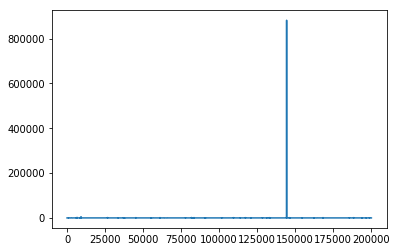

In [8]:
import matplotlib.pyplot as plt

plt.plot(df['HAUTEUR (m)'])

plt.show()

Selon le graphe, il est clir qu il exixste des valeurs abberante, pour cela on va admesttre que la hauteur maximale
d'un arbre est inférieur ou égal à 100m

In [9]:
df=df[df['HAUTEUR (m)']<=100 ]
df.shape     

(200195, 17)

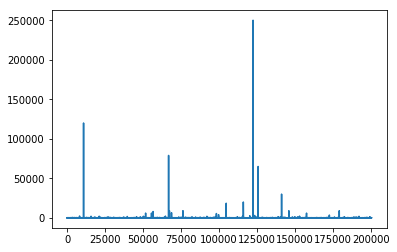

In [10]:
import matplotlib.pyplot as plt

plt.plot(df['CIRCONFERENCEENCM'])

plt.show()

la nouvelle base de donnee contient juste 199953 après avoir supprimé les valeurs abberantes dans les deux variables hauteur et circonférence

In [11]:
df=df[df['CIRCONFERENCEENCM']<=400 ]
df.shape  

(199953, 17)

# 3.nature des arbres par arrondissement

*nombre d'arbres

In [141]:
df['DOMANIALITE'].value_counts()

Alignement      104879
Jardin           46174
CIMETIERE        31924
DASCO             6421
PERIPHERIQUE      5324
DJS               3882
DFPE              1323
DAC                 21
DASES                4
Name: DOMANIALITE, dtype: int64

In [142]:
df['ESPECE'].value_counts()

x hispanica                     36323
hippocastanum                   20034
japonica                        11808
n. sp.                           9065
tomentosa                        8964
pseudoplatanus                   7427
platanoides                      6294
nigra                            4940
x europaea                       4704
x carnea                         4415
australis                        4106
cordata                          3843
excelsior                        3808
betulus                          3462
occidentalis                     3430
colurna                          3378
calleryana                       3124
platyphyllos                     2915
orientalis                       2745
serrulata                        2400
pseudoacacia                     2297
baccata                          2010
sylvatica                        1930
campestre                        1524
pendula                          1458
alba                             1313
nigra subsp.

In [143]:
df['ARRONDISSEMENT'].value_counts()

PARIS 15E ARRDT      17138
PARIS 13E ARRDT      16687
PARIS 16E ARRDT      16366
PARIS 20E ARRDT      15333
PARIS 19E ARRDT      13692
PARIS 12E ARRDT      12563
SEINE-SAINT-DENIS    11573
BOIS DE VINCENNES    11493
PARIS 14E ARRDT      11401
PARIS 17E ARRDT      10750
PARIS 18E ARRDT      10009
PARIS 7E ARRDT        8613
VAL-DE-MARNE          7576
PARIS 8E ARRDT        7223
PARIS 11E ARRDT       5661
HAUTS-DE-SEINE        5299
BOIS DE BOULOGNE      3980
PARIS 10E ARRDT       3383
PARIS 4E ARRDT        2734
PARIS 5E ARRDT        2390
PARIS 6E ARRDT        1758
PARIS 1ER ARRDT       1410
PARIS 3E ARRDT        1209
PARIS 9E ARRDT        1165
PARIS 2E ARRDT         547
Name: ARRONDISSEMENT, dtype: int64

*nombre de variétés d'arbres

In [24]:
gb=df.groupby( by='ARRONDISSEMENT' ).mean()
gb.reset_index(inplace=True)
gb

,ARRONDISSEMENT,IDBASE,NUMERO,CIRCONFERENCEENCM,HAUTEUR (m),REMARQUABLE
0,BOIS DE BOULOGNE,8.677766e+05,NaN,65.980905,8.192965,0.000000
1,BOIS DE VINCENNES,1.880959e+06,NaN,69.004524,8.421300,0.000000
2,HAUTS-DE-SEINE,2.086451e+05,NaN,16.809775,1.520853,0.000000
3,PARIS 10E ARRDT,3.218509e+05,NaN,82.993497,10.221106,0.000348
4,PARIS 11E ARRDT,2.515127e+05,NaN,81.895248,10.306660,0.000216
5,PARIS 12E ARRDT,3.484001e+05,NaN,82.086285,9.000080,0.002111
6,PARIS 13E ARRDT,3.558655e+05,NaN,71.589681,8.564811,0.000364
7,PARIS 14E ARRDT,2.639323e+05,NaN,97.192439,9.249803,0.000803
8,PARIS 15E ARRDT,2.516443e+05,NaN,69.456704,6.322033,0.000743
9,PARIS 16E ARRDT,2.459576e+05,NaN,93.122021,10.048087,0.003663


*statistiques de la hauteur et de la circonférence des arbres

# 4. les arbres remarquables

In [159]:
print(df['REMARQUABLE'])

0         0.0
1         NaN
2         NaN
3         0.0
4         NaN
5         NaN
6         NaN
7         0.0
8         0.0
9         NaN
10        NaN
11        NaN
12        NaN
13        NaN
14        0.0
15        NaN
16        0.0
17        0.0
18        NaN
19        0.0
20        NaN
21        0.0
22        0.0
23        NaN
24        0.0
25        0.0
26        0.0
27        0.0
28        0.0
29        0.0
         ... 
200302    0.0
200303    0.0
200304    0.0
200305    0.0
200306    0.0
200307    0.0
200308    0.0
200309    0.0
200310    0.0
200311    NaN
200312    NaN
200313    0.0
200314    0.0
200315    0.0
200316    0.0
200317    0.0
200318    0.0
200319    0.0
200320    0.0
200321    0.0
200322    0.0
200323    0.0
200324    0.0
200325    0.0
200326    0.0
200327    0.0
200328    0.0
200329    0.0
200330    0.0
200331    NaN
Name: REMARQUABLE, Length: 199953, dtype: float64


In [157]:
df['REMARQUABLE'].value_counts()


0.0    136718
1.0       141
Name: REMARQUABLE, dtype: int64

on remarque que la plut part des arbres sont non remarquables ainsi qu'il existe des valeurs manquantes

 Qu'est ce qui caractérise les arbres remarquables par rapport aux autres?

In [195]:
arbres_remarquables=df[df['REMARQUABLE']==1.0 ]
arbres_remarquables.describe()


,IDBASE,NUMERO,CIRCONFERENCEENCM,HAUTEUR (m),REMARQUABLE
count,1.410000e+02,0.0,141.000000,141.000000,141.0
mean,6.162199e+05,NaN,230.758865,17.276596,1.0
std,8.163146e+05,NaN,92.302059,7.250721,0.0
min,1.020270e+05,NaN,30.000000,3.000000,1.0
25%,1.168860e+05,NaN,160.000000,12.000000,1.0
50%,1.352620e+05,NaN,221.000000,16.000000,1.0
75%,2.002344e+06,NaN,306.000000,23.000000,1.0
max,2.017817e+06,NaN,399.000000,40.000000,1.0


In [194]:
arbres_nonremarquables=df[df['REMARQUABLE']==0.0 ]
arbres_nonremarquables.describe()

,IDBASE,NUMERO,CIRCONFERENCEENCM,HAUTEUR (m),REMARQUABLE
count,1.367180e+05,0.0,136718.000000,136718.000000,136718.0
mean,4.867620e+05,NaN,87.325626,9.870039,0.0
std,6.330689e+05,NaN,59.341348,6.488841,0.0
min,9.987400e+04,NaN,0.000000,0.000000,0.0
25%,2.044605e+05,NaN,40.000000,5.000000,0.0
50%,2.469545e+05,NaN,80.000000,10.000000,0.0
75%,2.860358e+05,NaN,120.000000,14.000000,0.0
max,2.024745e+06,NaN,400.000000,100.000000,0.0


selon les résultats trouvés dans les tableaux ci-dessus, on remarque que les arbres remarquables sont  plus épais et longs ( moyenne de hauteur = 17.276596,moyenne de circonférence= 230.758865) que les arbres non remarquables ( moyenne de hauteur = 9.870039 ,moyenne de circonférence= 87.325626)




Quand la valeur manque, on ne peut pas supposer que l'arbre n'est pas remarquable, on peut gerer cela par voir ses 
caracteristiques (hauteur et circonférence ) et décider par la suite s'il est remarquable ou non 


In [28]:
texte='PARIS 9E ARRDT'
texte='156'+texte.split(' ')[1].replace('E',' ').replace('R',' ').zfill(2)
texte

'1569 '